<div dir="rtl" align=center lang="fa"><font face="Tahoma" size="6">بررسی و کاوش شاخص آلودگی هوای شهر تهران</font></div>

.


---
<div dir="rtl" lang="fa"><font face="Tahoma" size="2.5" color="grey">انجام شده توسط مهیار ملکی - 810100476</font></div>


---

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from persiantools.jdatetime import JalaliDate
from tqdm import tqdm
import missingno as mnso
import seaborn as sns
from bidi.algorithm import get_display
from arabic_reshaper import reshape
import re
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

---

<div dir="rtl" lang="fa"><font face="Tahoma" size="5">- بارگزاری داده ها</font></div>

<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color="blue">- 
در اینجا جدول شاخص آلودگی که از سایت air.tehran.ir تهیه شده را بارگزاری می کنیم.
</font></div>

In [2]:
AQ = pd.read_excel('report.xlsx', sheet_name=0)
AQ.head()

,وضعیت آلودگی هوا به لحاظ آلاینده و به تفکیک روز,وضعیت آلودگی هوا به لحاظ آلاینده و به تفکیک روز.1,وضعیت آلودگی هوا به لحاظ آلاینده و به تفکیک روز.2,وضعیت آلودگی هوا به لحاظ آلاینده و به تفکیک روز.3,وضعیت آلودگی هوا به لحاظ آلاینده و به تفکیک روز.4,وضعیت آلودگی هوا به لحاظ آلاینده و به تفکیک روز.5,وضعیت آلودگی هوا به لحاظ آلاینده و به تفکیک روز.6,وضعیت آلودگی هوا به لحاظ آلاینده و به تفکیک روز.7,وضعیت آلودگی هوا به لحاظ آلاینده و به تفکیک روز.8,وضعیت آلودگی هوا به لحاظ آلاینده و به تفکیک روز.9,وضعیت آلودگی هوا به لحاظ آلاینده و به تفکیک روز.10,وضعیت آلودگی هوا به لحاظ آلاینده و به تفکیک روز.11,وضعیت آلودگی هوا به لحاظ آلاینده و به تفکیک روز.12,وضعیت آلودگی هوا به لحاظ آلاینده و به تفکیک روز.13,وضعیت آلودگی هوا به لحاظ آلاینده و به تفکیک روز.14
0,ایستگاه,تاریخ,CO,O3,NO2,SO2,PM10,PM2.5,AQI,پاک,قابل قبول,ناسالم برای گروه حساس,ناسالم,بسیار ناسالم,خطرناک
1,جمع کل,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128,1693,614,49,1,NaN
2,کل ایستگاه ها,1394/01/01,48,20,56,19,34,61,61,NaN,1,NaN,NaN,NaN,NaN
3,کل ایستگاه ها,1394/01/02,24,27,51,20,31,51,51,NaN,1,NaN,NaN,NaN,NaN
4,کل ایستگاه ها,1394/01/03,29,30,45,18,14,29,30,1,NaN,NaN,NaN,NaN,NaN


<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color="blue">- 
اینجا نیز جدول آب و هوا که از سایت meteostat.net تهیه شده را بارگزاری می کنیم.
</font></div>

In [3]:
W = pd.read_excel('export.xlsx')
W.head()

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2015-01-01,9.3,4.0,13.0,0.0,NaN,NaN,6.4,NaN,NaN,NaN
1,2015-01-02,10.8,6.8,15.4,0.0,NaN,NaN,14.1,NaN,NaN,NaN
2,2015-01-03,9.8,6.0,14.0,0.0,NaN,NaN,13.9,NaN,NaN,NaN
3,2015-01-04,8.5,5.0,12.4,0.0,NaN,284.8,22.3,NaN,NaN,NaN
4,2015-01-05,7.8,1.6,21.4,0.0,NaN,NaN,13.0,NaN,NaN,NaN


---

<div dir="rtl" lang="fa"><font face="Tahoma" size="5">- فیلتر و انتخاب سطرها و ستون های مورد نیاز</font></div>

<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color="blue">- 
جدول اول را مرتب کرده و سطرها و ستون های اضافی را حذف می کنیم.
</font></div>

In [4]:
AQ.set_axis(AQ.loc[0,:], axis=1, inplace=True)
AQ = AQ.iloc[2:-6,:]
AQ = AQ.drop(columns=['ایستگاه','پاک','قابل قبول','ناسالم  برای گروه حساس','ناسالم','بسیار ناسالم','خطرناک'])
AQ.rename(columns={'تاریخ' : 'date'}, inplace=True)
AQ.reset_index(drop=True, inplace=True)

AQ.head()

,date,CO,O3,NO2,SO2,PM10,PM2.5,AQI
0,1394/01/01,48,20,56,19,34,61,61
1,1394/01/02,24,27,51,20,31,51,51
2,1394/01/03,29,30,45,18,14,29,30
3,1394/01/04,28,30,52,20,18,29,30
4,1394/01/05,30,29,60,27,30,53,53


---

<div dir="rtl" lang="fa"><font face="Tahoma" size="5">- یکسان سازی فرمت و ادغام 2 جدول بارگزاری شده بر اساس ستون تاریخ</font></div>

<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color="blue">- 
فرمت تاریخ جدول دوم به صورت میلادی است، لذا آن را به شمسی تبدیل کرده و همچنین ستون های مورد نظر را از این جدول انتخاب می کنیم.
</font></div>

In [5]:
W['date'] = W.date.apply(lambda x: JalaliDate.to_jalali(int(x[:4]),int(x[5:7]),int(x[8:]))).astype('str')
W['date'] = W.date.str.replace('-','/')
W = W.loc[79:,:].reset_index(drop=True)
W = W.drop(columns=['tmin','tmax','wdir','wpgt','pres','tsun'])

W.head()

,date,tavg,prcp,snow,wspd
0,1394/01/01,15.9,NaN,NaN,10.3
1,1394/01/02,13.5,NaN,NaN,NaN
2,1394/01/03,7.7,NaN,NaN,28.2
3,1394/01/04,10.6,NaN,NaN,7.4
4,1394/01/05,12.6,0.0,NaN,9.1


<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color="blue">- 
حال دو جدول را ادغام میکنیم.
</font></div>

In [6]:
AQ_final = W.join(AQ.iloc[:,1:])
AQ_final.head()

,date,tavg,prcp,snow,wspd,CO,O3,NO2,SO2,PM10,PM2.5,AQI
0,1394/01/01,15.9,NaN,NaN,10.3,48,20,56,19,34,61,61
1,1394/01/02,13.5,NaN,NaN,NaN,24,27,51,20,31,51,51
2,1394/01/03,7.7,NaN,NaN,28.2,29,30,45,18,14,29,30
3,1394/01/04,10.6,NaN,NaN,7.4,28,30,52,20,18,29,30
4,1394/01/05,12.6,0.0,NaN,9.1,30,29,60,27,30,53,53


---

<div dir="rtl" lang="fa"><font face="Tahoma" size="5">- بررسی جدول بدست آمده</font></div>

In [7]:
AQ_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2485 entries, 0 to 2484
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2485 non-null   object 
 1   tavg    2484 non-null   float64
 2   prcp    2411 non-null   float64
 3   snow    17 non-null     float64
 4   wspd    2334 non-null   float64
 5   CO      2485 non-null   object 
 6   O3      2485 non-null   object 
 7   NO2     2485 non-null   object 
 8   SO2     2485 non-null   object 
 9   PM10    2485 non-null   object 
 10  PM2.5   2485 non-null   object 
 11  AQI     2485 non-null   object 
dtypes: float64(4), object(8)
memory usage: 233.1+ KB


<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color="blue">- 
با بررسی جدول تعداد خانه های خالی مشخص می شود، همچنین تایپ داده های عددی باید درست شود
.</font></div>

---

<div dir="rtl" lang="fa"><font face="Tahoma" size="5">- پر کردن خانه های خالی</font></div>

<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color="blue">- 
دیدیم که بیشترین تعداد خانه های خالی برای ستون میزان بارش برف است. دلیل این اتفاق واضح است چون تعداد روزهایی که بارش برف داشته ایم بسیار کم است لذا این خانه ها را با مقدار صفر پر میکنیم. بقیه ستونها خانه های خالی خیلی کمی دارند بنابراین می توان آنها را با استفاده از روش interpolate پر کرد.
</font></div>

In [8]:
AQ_final.snow = AQ_final.snow.fillna(0)
AQ_final = AQ_final.interpolate()
AQ_final = AQ_final.fillna(method='bfill')
AQ_final.head()

,date,tavg,prcp,snow,wspd,CO,O3,NO2,SO2,PM10,PM2.5,AQI
0,1394/01/01,15.9,0.0,0.0,10.30,48,20,56,19,34,61,61
1,1394/01/02,13.5,0.0,0.0,19.25,24,27,51,20,31,51,51
2,1394/01/03,7.7,0.0,0.0,28.20,29,30,45,18,14,29,30
3,1394/01/04,10.6,0.0,0.0,7.40,28,30,52,20,18,29,30
4,1394/01/05,12.6,0.0,0.0,9.10,30,29,60,27,30,53,53


---

<div dir="rtl" lang="fa"><font face="Tahoma" size="5">- ایجاد ستون جدید نشان دهنده برچسب شاخص آلودگی با توجه به بازه بندی موجود مقادیر</font></div>

<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color="blue">- 
با توجه به جدول زیر ستونی برای برچسب شاخص آلودگی به جدول اضافه می کنیم
.</font></div>



<div><font face="Tahoma" size="3" color="blue">

عدد شاخص | برچسب
--- | ---
0 - 50 | پاک
51 - 100 | سالم
101 - 150 | ناسالم برای گروه های حساس
151 - 200 | ناسالم
201 - 300 | بسیار ناسالم
301 - 500 | خطرناک
    
</font></div>

In [9]:
def aqi(x):
    if x in range(0,51):
        return 1   # پاک
    if x in range(51,101):
        return 2   # سالم
    if x in range(101,151):
        return 3   # ناسالم برای گروه های حساس
    if x in range(151,201):
        return 4   # ناسالم
    if x in range(201,301):
        return 5   # بسیار ناسالم
    if x in range(301,501):
        return 6   # خطرناک

In [10]:
AQ_final['label'] = AQ_final['AQI'].apply(aqi)
AQ_final.head()

,date,tavg,prcp,snow,wspd,CO,O3,NO2,SO2,PM10,PM2.5,AQI,label
0,1394/01/01,15.9,0.0,0.0,10.30,48,20,56,19,34,61,61,2
1,1394/01/02,13.5,0.0,0.0,19.25,24,27,51,20,31,51,51,2
2,1394/01/03,7.7,0.0,0.0,28.20,29,30,45,18,14,29,30,1
3,1394/01/04,10.6,0.0,0.0,7.40,28,30,52,20,18,29,30,1
4,1394/01/05,12.6,0.0,0.0,9.10,30,29,60,27,30,53,53,2


---

<div dir="rtl" lang="fa"><font face="Tahoma" size="5">- تبدیل تایپ تمام مقادیر عددی جدول به int</font></div>

In [11]:
for i in AQ_final.columns[1:]:
    AQ_final[i] = AQ_final[i].astype('int')
    
AQ_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2485 entries, 0 to 2484
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    2485 non-null   object
 1   tavg    2485 non-null   int32 
 2   prcp    2485 non-null   int32 
 3   snow    2485 non-null   int32 
 4   wspd    2485 non-null   int32 
 5   CO      2485 non-null   int32 
 6   O3      2485 non-null   int32 
 7   NO2     2485 non-null   int32 
 8   SO2     2485 non-null   int32 
 9   PM10    2485 non-null   int32 
 10  PM2.5   2485 non-null   int32 
 11  AQI     2485 non-null   int32 
 12  label   2485 non-null   int32 
dtypes: int32(12), object(1)
memory usage: 136.0+ KB


---

<div dir="rtl" lang="fa"><font face="Tahoma" size="5">- جدول نهایی</font></div>

In [12]:
AQ_final

,date,tavg,prcp,snow,wspd,CO,O3,NO2,SO2,PM10,PM2.5,AQI,label
0,1394/01/01,15,0,0,10,48,20,56,19,34,61,61,2
1,1394/01/02,13,0,0,19,24,27,51,20,31,51,51,2
2,1394/01/03,7,0,0,28,29,30,45,18,14,29,30,1
3,1394/01/04,10,0,0,7,28,30,52,20,18,29,30,1
4,1394/01/05,12,0,0,9,30,29,60,27,30,53,53,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2480,1400/10/13,6,0,0,16,28,7,64,18,52,108,108,3
2481,1400/10/14,5,0,0,15,29,11,64,27,43,78,78,2
2482,1400/10/15,7,0,0,20,33,15,73,23,49,80,80,2
2483,1400/10/16,4,0,0,9,27,16,63,18,38,62,63,2


---

<div dir="rtl" lang="fa"><font face="Tahoma" size="5">- بارگزاری دیتای جغرافیایی</font></div>

<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color="blue">- 
نقشه تهران و منطقه های آن را که از لینک زیر دانلود شده، بارگزاری می کنیم
.</font></div>
https://github.com/sadegh-khan/tehran-map-geojson

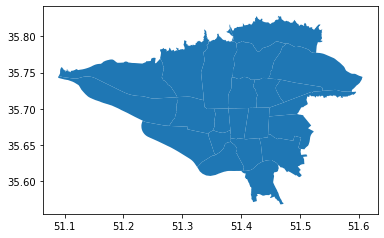

In [13]:
df_places = gpd.read_file('tehran-areas-22-polygon.geojson')
df_places = df_places.sort_values('area').set_index('area')
df_places.plot();

---

<div dir="rtl" lang="fa"><font face="Tahoma" size="5">- بارگزاری داده های تفکیک شده مناطق تهران</font></div>

<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color="blue">- 
جداول شاخص آلودگی به تفکیک مناطق تهران را نیز که از سایت air.tehran.ir تهیه شده را بارگزاری می کنیم
.</font></div>

In [14]:
areas = []
for i in tqdm(range(1,45)):
    area = pd.read_excel('report.xlsx', sheet_name=i)
    area.set_axis(area.loc[0,:], axis=1, inplace=True)
    area = area.iloc[2:2487,:].reset_index(drop=True)
    area.drop(columns=['پاک','قابل قبول','ناسالم  برای گروه حساس','ناسالم','بسیار ناسالم','خطرناک'], inplace=True)
    area.rename(columns={'ایستگاه':'area', 'تاریخ':'date'}, inplace=True)
    areas.append(area)

areas_df = pd.concat(areas)

100%|████████████████████████████████████████| 44/44 [00:29<00:00,  1.48it/s]


---

<div dir="rtl" lang="fa"><font face="Tahoma" size="5">- بررسی خانه های خالی جدول</font></div>

The number of missing values of column AQI is 31337 of 104370


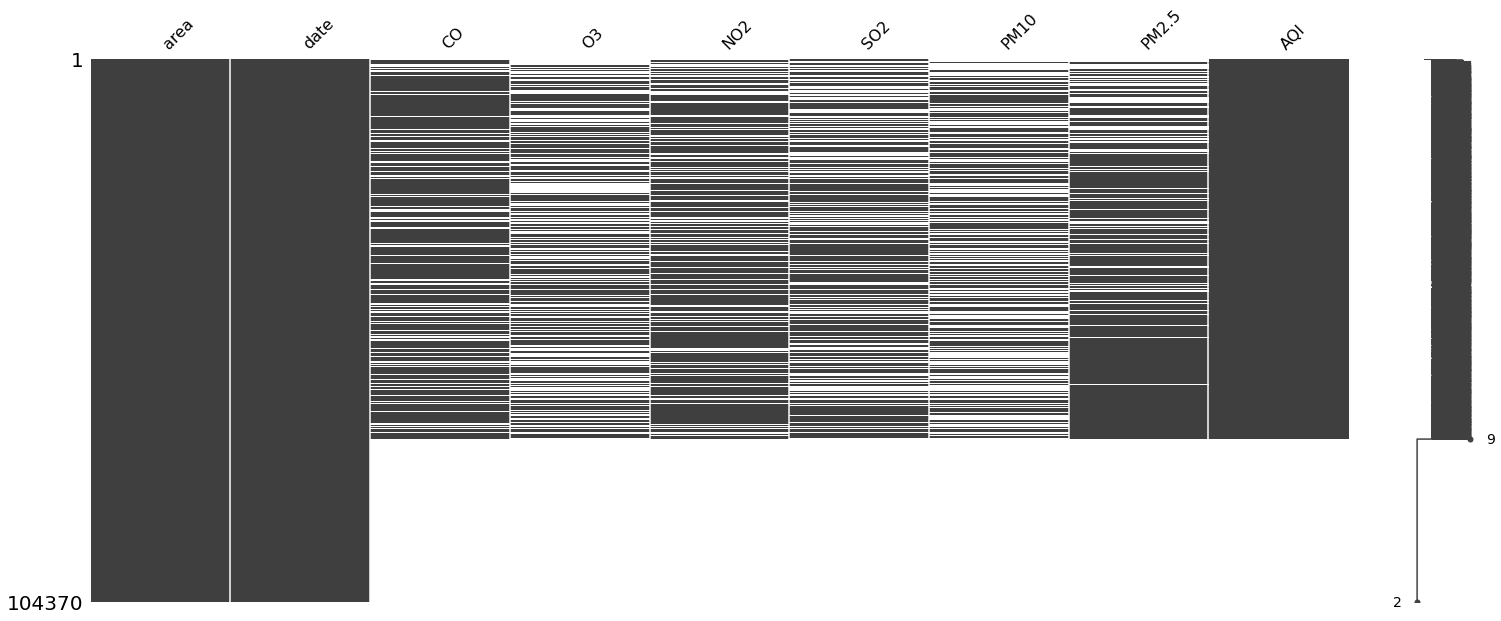

In [15]:
mnso.matrix(areas_df.sort_values('AQI'))
print('The number of missing values of column AQI is', areas_df.AQI.isna().sum(), 'of', areas_df.shape[0])

<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color="blue">- 
مشاهده می شود که نزدیک به یک سوم ستون AQI که مورد نیاز ما است خای می باشد
.</font></div>

<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color="blue">- 
نام ایستگاه ها را با شماره منطقه ای که در آن قرار دارند استاندار می کنیم
.</font></div>

<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color="blue">- 
سپس بر اساس سال و منطقه درصد خانه های خالی را محاسبه میکنیم
.</font></div>

In [16]:
def regex(x):
    try:
        return int(re.findall(r"\d+", x)[0])
    except:
        return 5  # punak is in district 5

In [17]:
ars = areas_df.copy()
ars.area = ars.area.apply(regex)
ars['year'] = ars['date'].str.split('/', expand=True)[0]
nulls = ars.groupby(['area','year']).agg({'AQI': lambda x: x.isnull().sum()}).divide(ars.groupby(['area','year']).count()['date'], axis=0)*100
nulls = pd.DataFrame(nulls).reset_index().rename(columns={'AQI':'% of missing values'}).sort_values('% of missing values', ascending=False)
nulls.head(10)

,area,year,% of missing values
77,12,1394,83.835616
28,5,1394,79.657534
17,3,1397,78.812785
29,5,1395,78.210383
30,5,1396,76.643836
31,5,1397,75.890411
20,3,1400,75.881684
33,5,1399,75.273224
32,5,1398,75.068493
34,5,1400,75.000000


<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color="blue">- 
مشاهده می کنیم که برخی مناطق درصد خیلی بالایی خانه خالی دارند. حال در ادامه فقط بر اساس منطقه این کار را تکرار میکنیم
.</font></div>

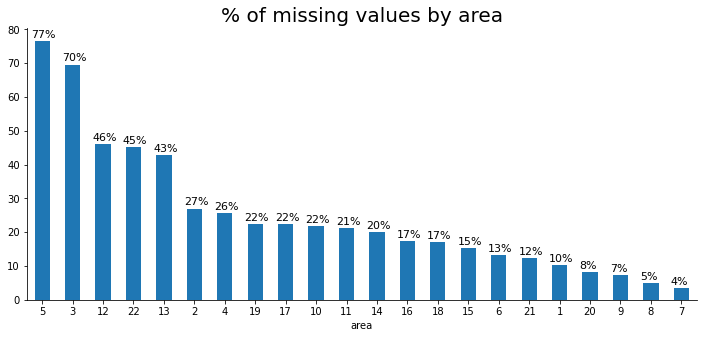

In [18]:
nulls_plot = ars.groupby('area').agg({'AQI': lambda x: x.isnull().sum()}).divide(ars.groupby('area').count()['date'],axis=0)*100

ax = nulls_plot.sort_values('AQI',ascending=False).plot(kind='bar', figsize=(12,5), legend=False)
for i in ax.patches:
    plt.text( i.get_x()-0.1, i.get_height()+1,
             str(round(i.get_height()))+'%',
             fontsize = 11 )

plt.xticks(rotation=0)
sns.despine(top=True, right=True)
plt.title('% of missing values by area', fontsize=20);

<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color="blue">- 
مشاهده می شود که بیشترین خانه خالی برای مناطق 3 و 5 می باشد
    .</font></div>

---

<div dir="rtl" lang="fa"><font face="Tahoma" size="5">- پر کردن خانه های خالی جدول</font></div>

<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color="blue">- 
با استفاده از روش interpolate خانه های خالی هر جدول را جداگانه پر کرده و در نهایت دوباره جدولها را به هم می چسبانیم
.</font></div>

In [19]:
areas_df = pd.DataFrame()
for df in areas:
    df.AQI.fillna(np.nan, inplace=True)
    df.AQI = df.AQI.astype('float')
    df.AQI.interpolate(inplace=True)
    areas_df = pd.concat([areas_df,df])

<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color="blue">- 
حال دوباره مقادیری که در بالا به دست آمد را برای جدول جدید محاسبه می کنیم
.</font></div>

The number of missing values of column AQI is 11932 of 104370


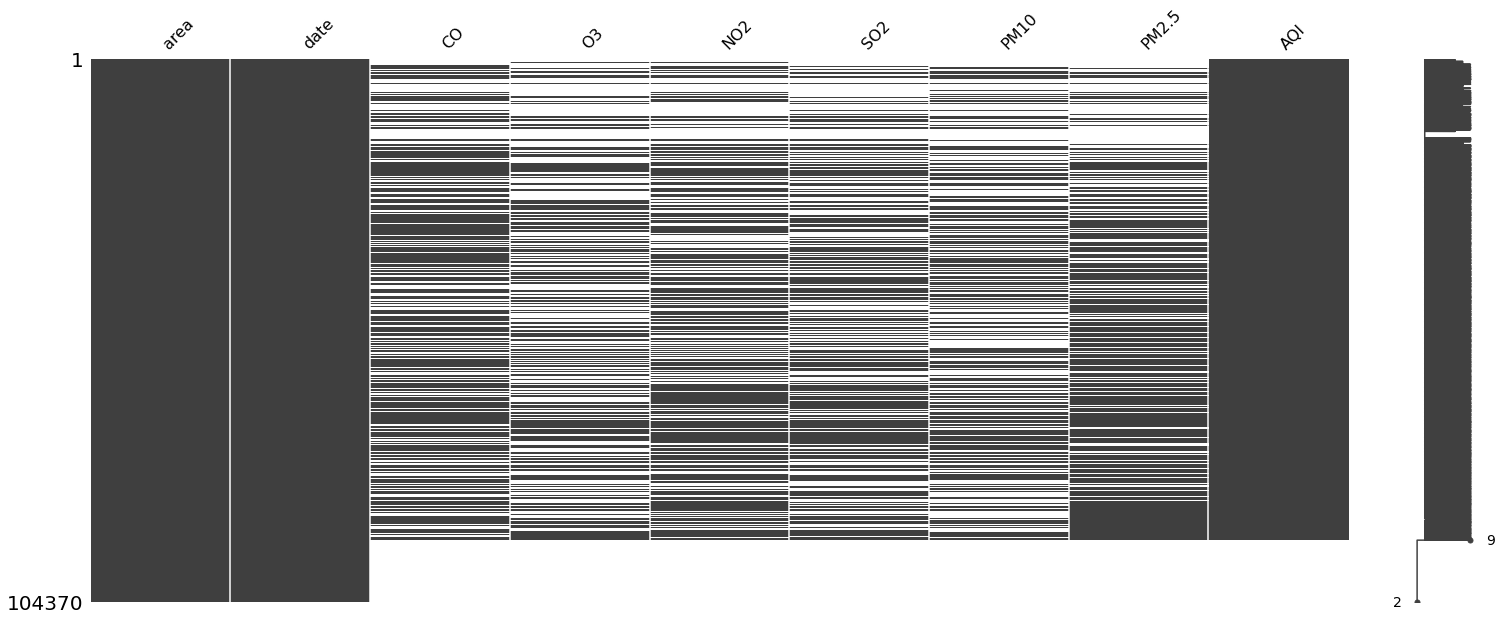

In [20]:
mnso.matrix(areas_df.sort_values('AQI'))
print('The number of missing values of column AQI is', areas_df.AQI.isna().sum(), 'of', areas_df.shape[0])

<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color="blue">- 
مشاهده می شود که خانه های خالی بسیار کمتر شده اند. خانه های خالی باقی مانده احتمالا خانه های اول یا آخر جدول بوده اند که با روش اینترپولیت پر نشده اند
.</font></div>

In [21]:
areas_df.area = areas_df.area.apply(regex)
areas_df['year'] = areas_df['date'].str.split('/', expand=True)[0]
nulls = areas_df.groupby(['area','year']).agg({'AQI': lambda x: x.isnull().sum()}).divide(areas_df.groupby(['area','year']).count()['date'], axis=0)*100
nulls = pd.DataFrame(nulls).reset_index().rename(columns={'AQI':'% of missing values'}).sort_values('% of missing values', ascending=False)
nulls.head(10)

,area,year,% of missing values
28,5,1394,75.205479
31,5,1397,75.000000
33,5,1399,75.000000
29,5,1395,75.000000
34,5,1400,75.000000
30,5,1396,75.000000
32,5,1398,75.000000
77,12,1394,61.917808
140,21,1394,50.958904
147,22,1394,33.333333


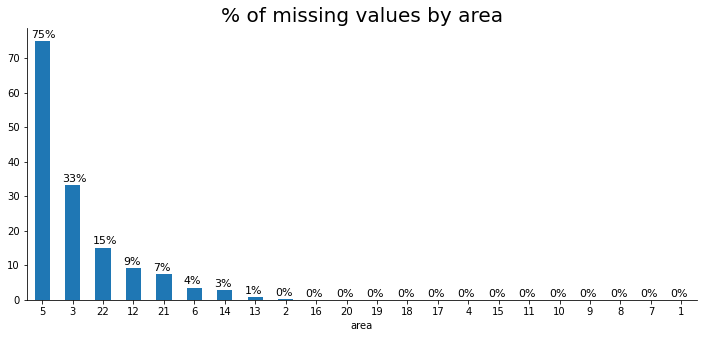

In [22]:
nulls_plot = areas_df.groupby('area').agg({'AQI': lambda x: x.isnull().sum()}).divide(areas_df.groupby('area').count()['date'],axis=0)*100

ax = nulls_plot.sort_values('AQI',ascending=False).plot(kind='bar', figsize=(12,5), legend=False)
for i in ax.patches:
    plt.text( i.get_x()-0.1, i.get_height()+1,
             str(round(i.get_height()))+'%',
             fontsize = 11 )

plt.xticks(rotation=0)
sns.despine(top=True, right=True)
plt.title('% of missing values by area', fontsize=20);

<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color="blue">- 
مشاهده می شود که مناطق 3 و 5 هنوز مقدار زیادی خانه خالی دارند
.</font></div>

<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color="blue">- 
برای کاوش بیشتر تعداد خانه های پر این مناطق را محاسبه میکنیم
.</font></div>

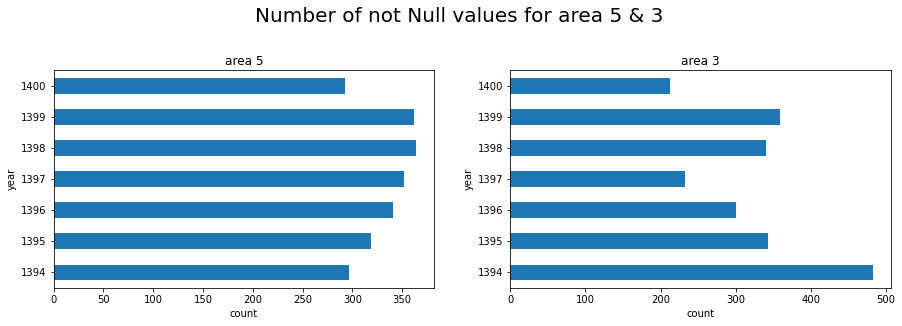

In [23]:
fig = plt.figure(figsize=(15,4))

ax1 = fig.add_subplot(1,2,1)
ars[ars.area == 5].groupby('year').count().plot(y='AQI',kind='barh', ax=ax1, legend=False)
plt.xlabel('count')
plt.title('area 5')
ax2 = fig.add_subplot(1,2,2)
ars[ars.area == 3].groupby('year').count().plot(y='AQI',kind='barh', ax=ax2, legend=False)
plt.xlabel('count')
plt.title('area 3')

plt.suptitle('Number of not Null values for area 5 & 3', fontsize=20, y=1.1)
plt.show();

<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color="blue">- 
مشاهده می شود که در هر منطقه برای هر سال به اندازه کافی داده موجود است و احتمالا مقادیر خالی مربوط به یک یا چند ایستگاه خاص بوده اند ( بعضی مناطق بیشتر از یک ایستگاه سنجش آلودگی هوا دارند )
</font></div>

<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color="blue">- 
لذا برای این که بایاس بیشتری ایجاد نشود با همین جدول ادامه می دهیم و با خانه های خالی باقی مانده کاری نداریم.
</font></div>

---

<div dir="rtl" lang="fa"><font face="Tahoma" size="5">- نمایش شاخص کیفیت هوا روی نقشه تهران در سالهای مختلف</font></div>

<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color="blue">- 
جدول نهایی بدست آمده را بر اساس منطقه و سال گروه بندی میکنیم
.</font></div>

In [24]:
AQI_yearly = areas_df.groupby(['area', 'year']).mean().reset_index()
AQI_yearly.head()

,area,year,AQI
0,1,1394,76.573973
1,1,1395,75.009107
2,1,1396,76.370320
3,1,1397,62.081279
4,1,1398,73.485845


In [25]:
def geoplt(year, ax, legend):
    gp = AQI_yearly[AQI_yearly.year == str(year)][['area', 'AQI']]
    gp = gp.join(df_places, on='area').reset_index(drop=True)
    gp = gpd.GeoDataFrame(gp)
    gp.plot(kind='geo', column='AQI', cmap='RdYlGn_r', vmin=50, vmax=120, legend=legend, 
            legend_kwds={'label':get_display(reshape('شاخص آلودگی هوا')),'orientation': "horizontal","location":"bottom"} ,
            edgecolor='grey', ax=ax)
    gp.apply(lambda x: ax.annotate(text=x['area'], xy=x.geometry.centroid.coords[0], ha='center', color='grey'), axis=1)
    sns.despine(bottom=True, left=True)
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.get_xaxis().set_visible(False)
    ax.set_title(str(year))

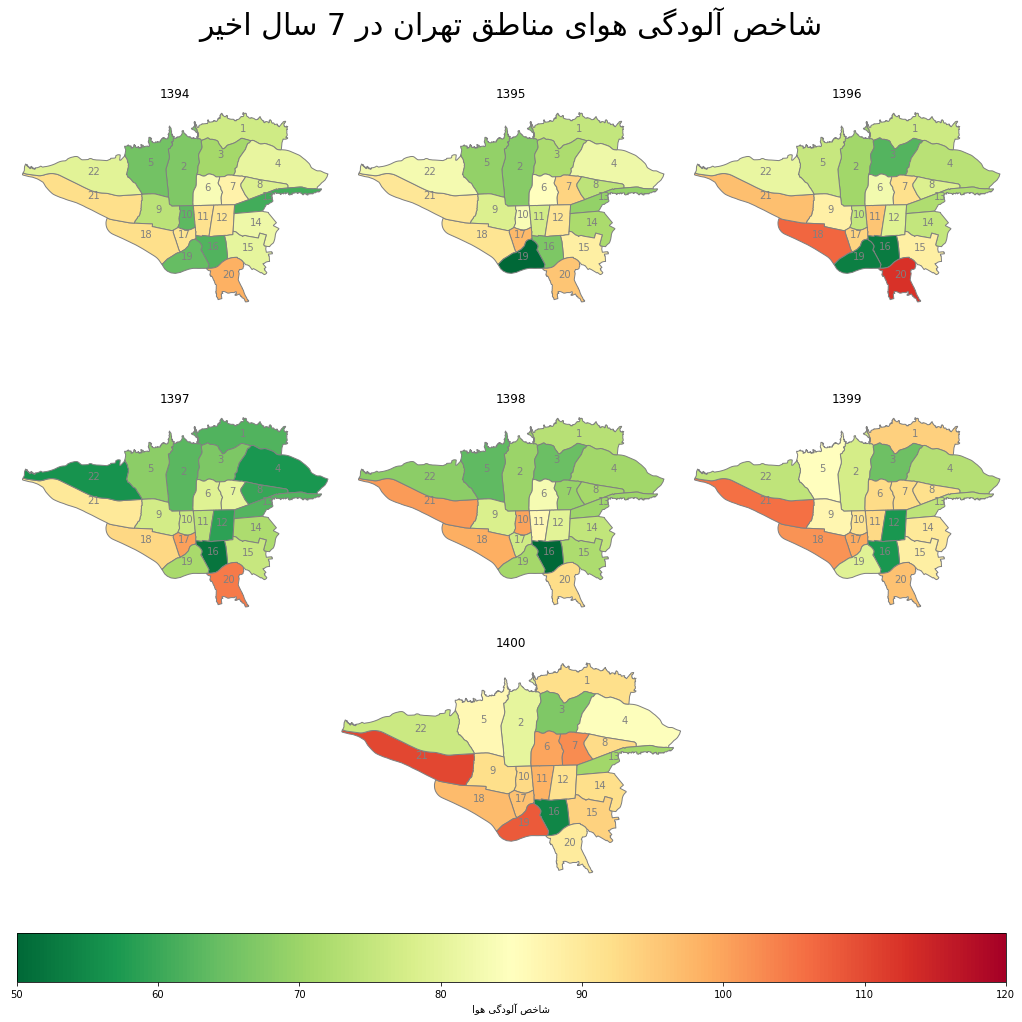

In [26]:
fig = plt.figure(figsize=(14,14))

ax1 = fig.add_subplot(3,3,1)
geoplt(1394, ax1, False)
ax2 = fig.add_subplot(3,3,2)
geoplt(1395, ax2, False)
ax3 = fig.add_subplot(3,3,3)
geoplt(1396, ax3, False)
ax4 = fig.add_subplot(3,3,4)
geoplt(1397, ax4, False)
ax5 = fig.add_subplot(3,3,5)
geoplt(1398, ax5, False)
ax6 = fig.add_subplot(3,3,6)
geoplt(1399, ax6, False)
ax7 = fig.add_subplot(3,1,3)
geoplt(1400, ax7, True)

fig.suptitle(get_display(reshape('شاخص آلودگی هوای مناطق تهران در 7 سال اخیر')), y=1, fontsize=30)
plt.tight_layout(pad=0)    

<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color="blue">- 
با بررسی و مقایسه نقشه ها به وضعیت بد شاخص آلودگی هوای تهران در سال جاری نسبت به سال های پیش پی می بریم
.</font></div>

<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color="blue">   
همچنین بنظر می رسد در سال 97 آلودگی هوا بسیار کمتر بوده است
.</font></div>

<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color="blue">   
همچنین مشاهده می شود مناطقی مانند منطقه 21 و 18 و 20 هر ساله جزو آلوده ترین مناطق هستند که می تواند ناشی از نزدیکی این مناطق به مراکز و کارخانجات صنعتی باشد
.</font></div>

---

<div dir="rtl" lang="fa"><font face="Tahoma" size="5">- بررسی تغییرات سالانه تعداد روزهای پاک و ناسالم</font></div>

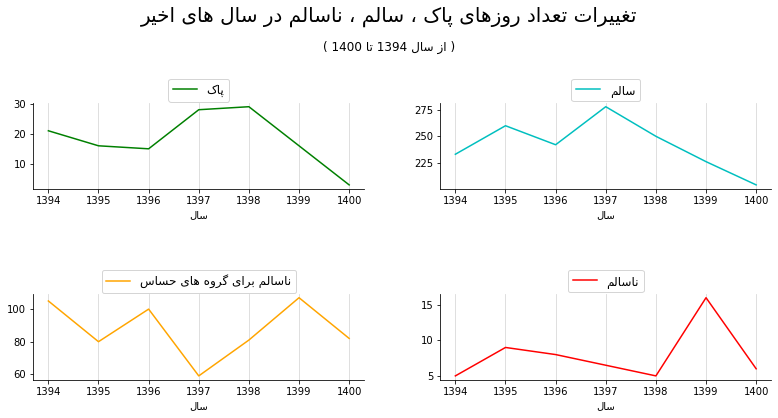

In [27]:
fig, axs = plt.subplots(2,2, figsize=(12,6))

lbls = ['پاک','سالم','ناسالم برای گروه های حساس','ناسالم',]
colors = ['g', 'c', 'orange', 'r']
for i in range(1,5):
    AQ_final_yearly = AQ_final[AQ_final.label == i].groupby(AQ_final[AQ_final.label == i].index // 365).count()
    axs.flat[i-1].plot(AQ_final_yearly.label, label=get_display(reshape(lbls[i-1])), color=colors[i-1])
    axs.flat[i-1].axes.set_xticks(range(0,7))
    axs.flat[i-1].axes.set_xticklabels(range(1394,1401))
    axs.flat[i-1].axes.set_xlabel(get_display(reshape('سال')))
    axs.flat[i-1].legend(loc='upper center', borderaxespad=-2, fontsize='large')
    axs.flat[i-1].grid(axis='x', alpha=.5)
    sns.despine(right=True)

    
plt.tight_layout(pad=5)    
fig.suptitle(t=get_display(reshape('تغییرات تعداد روزهای پاک ، سالم ، ناسالم در سال های اخیر')), y=1.05, fontsize=20)
plt.text(.5, 0.95, s=get_display(reshape('( از سال 1394 تا 1400 )')), 
         transform=fig.transFigure, horizontalalignment='center', size='large')

plt.show(); 

<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color="blue">- 
به وضوح قابل مشاهده است که تعداد روزهای پاک و سالم در سال های اخیر روندی کاهشی داشته و بالطبع تعداد روزهای ناسالم روندی افزایشی داشته 
.(البته سال 1400 هنوز تمام نشده و احتمال بیشتر شدن تعداد روزهای ناسالم در سال 1400 وجود دارد)</font></div>

---

<div dir="rtl" lang="fa"><font face="Tahoma" size="5">- بررسی تغییرات فصلی تعداد روزهای پاک و ناسالم</font></div>

<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color="blue">- 
حال برای این که بفهمیم کدام فصلها بیشترین سهم تعداد روزهای سالم و ناسالم را دارند این نمودارها را به صورت فصلی رسم میکنیم.</font></div>

In [28]:
def barchart(x):
    month = AQ_final.date.str.rsplit('/', 1, expand=True)[0]
    x=str(x)
    bhr = AQ_final[(month == x+'/01') | (month == x+'/02') | (month == x+'/03')].groupby('label').count()
    tbstn = AQ_final[(month == x+'/04') | (month == x+'/05') | (month == x+'/06')].groupby('label').count()
    pyz = AQ_final[(month == x+'/07') | (month == x+'/08') | (month == x+'/09')].groupby('label').count()
    zmstn = AQ_final[(month == x+'/10') | (month == x+'/11') | (month == x+'/12')].groupby('label').count()

    plt.bar( bhr.index-0.15, bhr.AQI, label=get_display(reshape('بهار')), 
             color='g', width = 0.1, zorder=5, alpha=0.8 )
    plt.bar( tbstn.index-0.05, tbstn.AQI, label=get_display(reshape('تابستان')), 
             color='r', width = 0.1, zorder=5, alpha=0.8 )
    plt.bar( pyz.index+0.05, pyz.AQI, label=get_display(reshape('پاییز')), 
             color='orange', width = 0.1, zorder=5, alpha=0.8 )
    plt.bar( zmstn.index+0.15, zmstn.AQI, label=get_display(reshape('زمستان')), 
             color='c', width = 0.1, zorder=5, alpha=0.8 )
    
    plt.xticks(range(1,5), labels=[get_display(reshape(label)) for label in lbls])
    plt.ylabel(get_display(reshape('تعداد روز ها')), rotation=0, labelpad=30)
    plt.grid(axis='y', alpha=.5, zorder=-5)
    plt.legend(fontsize='large')
    sns.despine(right=True)
    plt.title(x)

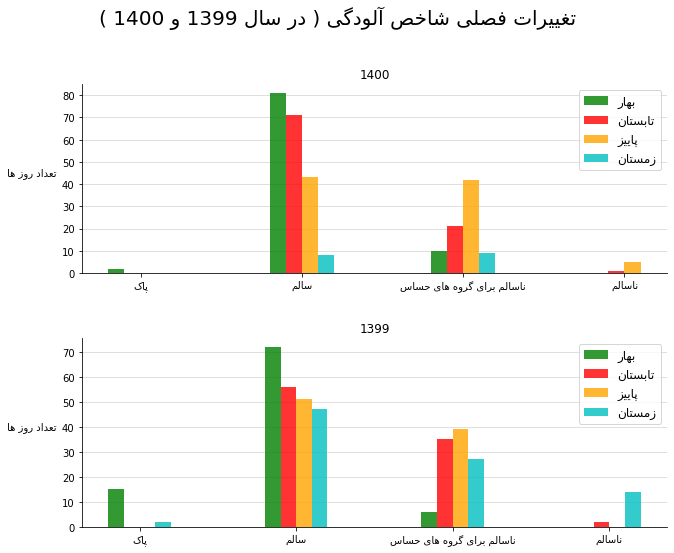

In [29]:
plt.figure(figsize=(10,15))

plt.subplot(411)
barchart(1400)

plt.subplot(412)
barchart(1399)

plt.suptitle(t=get_display(reshape('تغییرات فصلی شاخص آلودگی ( در سال 1399 و 1400 )')), fontsize=20)
plt.tight_layout(pad=3)
plt.show();

<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color="blue">- 
در نمودار تغییرات فصلی تعداد روزهای سالم و ناسالم و ... مشاهده می شود که تعداد روزهای سالم از بهار تا زمستان روندی کاهشی و بالطبع تعداد روزهای ناسالم روندی افزایشی دارد و فصل های پاییز و زمستان بیشترین تعداد روزهای ناسالم را نسبت به بقیه فصلها دارند که این امر ناشی از سرما و پدیده وارونگی هوا می باشد
.</font></div>

---

<div dir="rtl" lang="fa"><font face="Tahoma" size="5">- بررسی و مقایسه روند تغییرات آب و هوا و تغییرات شاخص آلودگی</font></div>

<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color="blue">- 
برای اینکه نمایش بهتری در نمودارها داشته باشیم، جدول را به بازه های 30 روزه تقسیم می کنیم
.</font></div>

In [30]:
AQ_final_monthly = AQ_final.groupby(AQ_final.index // 30).mean()
AQ_final_monthly

,tavg,prcp,snow,wspd,CO,O3,NO2,SO2,PM10,PM2.5,AQI,label
0,15.800000,0.933333,0.0,14.066667,33.700000,30.800000,56.700000,21.633333,37.166667,58.000000,58.133333,1.766667
1,22.400000,0.033333,0.0,14.533333,34.133333,33.600000,57.966667,22.066667,55.966667,81.066667,81.066667,2.200000
2,28.933333,0.066667,0.0,13.433333,33.766667,36.133333,52.633333,22.233333,70.066667,101.233333,101.233333,2.433333
3,32.700000,0.000000,0.0,10.800000,40.000000,48.266667,61.966667,24.333333,67.533333,98.300000,98.300000,2.466667
4,30.200000,0.300000,0.0,10.100000,36.866667,55.300000,67.233333,25.133333,60.733333,82.166667,82.433333,2.133333
...,...,...,...,...,...,...,...,...,...,...,...,...
78,29.533333,0.000000,0.0,9.966667,29.866667,70.700000,71.833333,18.466667,63.600000,82.500000,86.833333,2.133333
79,23.133333,0.033333,0.0,10.066667,33.133333,53.700000,72.700000,19.233333,72.033333,89.866667,90.533333,2.266667
80,14.666667,0.866667,0.0,10.066667,34.300000,25.200000,70.700000,34.766667,58.466667,89.200000,89.600000,2.233333
81,9.100000,0.600000,0.0,7.733333,41.133333,15.566667,88.133333,35.166667,72.600000,125.766667,125.833333,2.966667


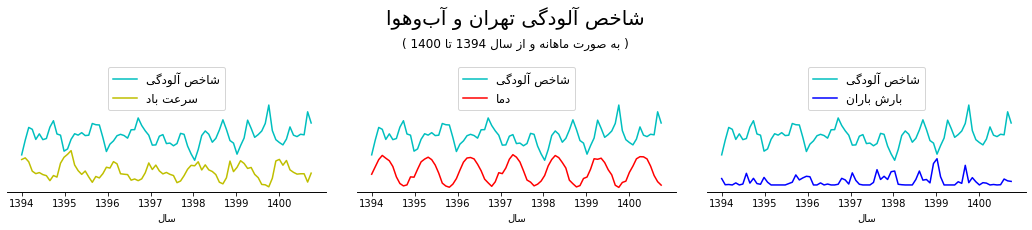

In [31]:
fig, axs = plt.subplots(1,3, figsize=(15,3), sharex=True)

axs0 = axs.flat[0]
ax1, = axs0.plot(AQ_final_monthly.AQI, 'c', label=get_display(reshape('شاخص آلودگی')))
ax1.axes.set_ylim(0,140)
ax1.axes.get_yaxis().set_visible(False)
ax1.axes.set_xticks(np.linspace(0,73,7))
ax1.axes.set_xticklabels([1394,1395,1396,1397,1398,1399,1400])
ax1.axes.set_xlabel(get_display(reshape('سال')))
ax2, = axs0.twinx().plot(AQ_final_monthly.wspd, 'y', label=get_display(reshape('سرعت باد')))
ax2.axes.set_ylim(5,30)
ax2.axes.get_yaxis().set_visible(False)
axs0.legend(loc=9, handles=[ax1, ax2], borderaxespad=-3, fontsize='large')
sns.despine(right=True, left=True)

axs2 = axs.flat[1]
ax5, = axs2.plot(AQ_final_monthly.AQI, 'c')
ax5.axes.set_ylim(0,140)
ax5.axes.get_yaxis().set_visible(False)
ax5.axes.set_xticks(np.linspace(0,73,7))
ax5.axes.set_xticklabels([1394,1395,1396,1397,1398,1399,1400])
ax5.axes.set_xlabel(get_display(reshape('سال')))
ax6, = axs2.twinx().plot(AQ_final_monthly.tavg, 'r', label=get_display(reshape('دما')))
ax6.axes.set_ylim(0,80)
ax6.axes.get_yaxis().set_visible(False)
axs2.legend(loc=9, handles=[ax1, ax6], borderaxespad=-3, fontsize='large')
sns.despine(right=True, left=True)

axs3 = axs.flat[2]
ax7, = axs3.plot(AQ_final_monthly.AQI, 'c')
ax7.axes.set_ylim(0,140)
ax7.axes.get_yaxis().set_visible(False)
ax7.axes.set_xticks(np.linspace(0,73,7))
ax7.axes.set_xticklabels([1394,1395,1396,1397,1398,1399,1400])
ax7.axes.set_xlabel(get_display(reshape('سال')))
ax8, = axs3.twinx().plot(AQ_final_monthly.prcp, 'b', label=get_display(reshape('بارش باران')))
ax8.axes.set_ylim(-1,12)
ax8.axes.get_yaxis().set_visible(False)
axs3.legend(loc=9, handles=[ax1, ax8], borderaxespad=-3, fontsize='large')
sns.despine(right=True, left=True)


plt.tight_layout(pad=3)    
fig.suptitle(t=get_display(reshape('شاخص آلودگی تهران و آب‌و‌هوا')), y=1.14, fontsize=20)
plt.text(.5, 0.95, s=get_display(reshape('( به صورت ماهانه و از سال 1394 تا 1400 )')), 
         transform=fig.transFigure, horizontalalignment='center', size='large')

plt.show();

<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color="blue">- 
همانطور که مشاهده می شود و انتظار نیز می رود سه پارامتر سرعت باد و دما و بارش باران با شاخص آلودگی نسبت عکس دارند. همچنین رفتار و روند این پارامترها در 7 سال اخیر تغییر به خصوصی نداشته است
.</font></div>

---

<div dir="rtl" lang="fa"><font face="Tahoma" size="5">- بررسی و مقایسه روند تغییرات آلاینده ها و تغییرات شاخص آلودگی</font></div>

<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color="blue">- 
شاخص آلودگی روزانه در واقع برابر است با مقدار استاندارد شده آلاینده ای که در آن روز بیشترین مقدار را داشته است
.</font></div>

<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color="blue">- 
حال میخواهیم بررسی کنیم که کدام آلاینده ها دفعات بیشتری به عنوان شاخص آلودگی هوا انتخاب شده اند
.</font></div>

In [32]:
def myplot(plt, alay, name, color):
    ax = axs.flat[plt]
    ax.plot(AQ_final.AQI, 'c.', alpha=0.3, label=get_display(reshape('شاخص آلودگی')))
    ax.plot(AQ_final[alay], color=color, marker='.', linestyle ='', alpha=0.3, label=get_display(reshape(name)))
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.set_xticks(np.linspace(0,AQ_final.shape[0]-200,7))
    ax.axes.set_xticklabels([1394,1395,1396,1397,1398,1399,1400])
    ax.legend(loc=9, borderaxespad=0, fontsize='large')
    sns.despine(right=True, left=True)

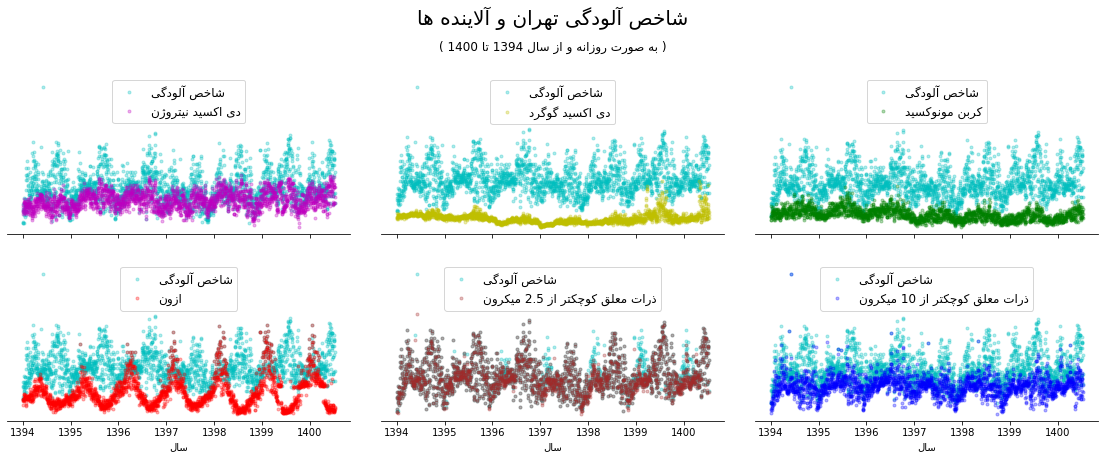

In [33]:
fig, axs = plt.subplots(2,3, figsize=(16,6), sharex=True)

myplot(0, 'NO2', 'دی اکسید نیتروژن', 'm')
myplot(1, 'SO2', 'دی اکسید گوگرد', 'y')
myplot(2, 'CO', 'کربن مونوکسید', 'g')
myplot(3, 'O3', 'ازون', 'r')
axs.flat[3].axes.set_xlabel(get_display(reshape('سال')))
myplot(4, 'PM2.5', 'ذرات معلق کوچکتر از 2.5 میکرون', 'brown')
axs.flat[4].axes.set_xlabel(get_display(reshape('سال')))
myplot(5, 'PM10', 'ذرات معلق کوچکتر از 10 میکرون', 'b')
axs.flat[5].axes.set_xlabel(get_display(reshape('سال')))

plt.tight_layout(pad=3)    
fig.suptitle(t=get_display(reshape('شاخص آلودگی تهران و آلاینده ها')), y=1.1, fontsize=20)
plt.text(0.5, 1, s=get_display(reshape('( به صورت روزانه و از سال 1394 تا 1400 )')), 
          transform=fig.transFigure, horizontalalignment='center', size='large')

plt.show();

<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color="blue">- 
همانطور که مشاهده می شود اسکتر روزانه ذرات معلق کوچکتر از 2.5 میکرون انطباق زیادی با شاخص آلودگی دارد، یعنی به نظر می رسد در اکثر روزها این آلاینده تایین کننده شاخص آلودگی است.</font></div> 
    
<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color="blue">    
از طرفی مشاهده می شود که نمودار اسکتر دی اکسید گوگرد و کربن مونوکسید کمترین انطباق را با شاخص دارند و تقریبا زیر نمودار اسکتر شاخص آلودگی قرار می گیرند، یعنی دفعات خیلی کمتری به عنوان شاخص آلودگی معرفی شده اند
.</font></div>

---

<div dir="rtl" lang="fa"><font face="Tahoma" size="5">- بررسی و مقایسه میزان تاثیر آلاینده ها بر شاخص آلودگی</font></div>

<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color="blue">- 
برای کاوش بیشتر بارچارت آلاینده ها به ازای تعداد روزهای انطباق آنها بر شاخص آلودگی را رسم می کنیم
.</font></div>

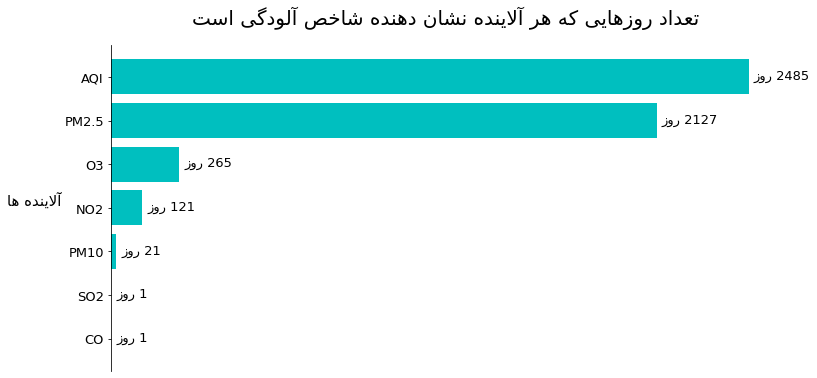

In [34]:
dic = {}
for i in AQ_final.columns[5:-1]:
    df = AQ_final[AQ_final.AQI == AQ_final[i]]
    dic[i] = [df.shape[0]]    
brplt = pd.DataFrame(dic).transpose().reset_index().sort_values(0)

fig, ax = plt.subplots(figsize=(12,6))
ax.barh(y=brplt['index'], width=brplt[0], color='c')
ax.set_yticklabels(brplt['index'],fontdict={'fontsize': 13})
ax.set_ylabel(get_display(reshape('آلاینده ها')), rotation=0, fontsize=15, labelpad=30)

for i in ax.patches:
    plt.text(i.get_width()+20, i.get_y()+0.35,
             get_display(reshape(' روز')) + str((i.get_width())),
             fontsize = 13 )

sns.despine(right=True, bottom=True)
ax.axes.get_xaxis().set_visible(False)
plt.title(get_display(reshape('تعداد روزهایی که هر آلاینده نشان دهنده شاخص آلودگی است')), fontsize=20, pad=20)

plt.show();

<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color="blue">- 
طبق چیزی که انتظار می رفت مقدار ذرات کوچکتر از 2.5 میکرون حدودا در 90 درصد مواقع از بقیه آلاینده ها مقدار بیشتری داشته و تایین کننده شاخص آلودگی بوده است، همچنین دی اکسید گوگرد و کربن مونوکسید در طی 7 سال هر کدام فقط یک روز به عنوان شاخص انتخاب شده اند
.</font></div>

<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color="blue">- 
در ادامه کاوش بیشتری انجام داده و این تاثیر آلاینده ها را در سال های مختلف مقایسه می کنیم و به نتایج جالبی می رسیم
.</font></div>

In [35]:
AQ_final = AQ_final.copy()
AQ_final['year'] = AQ_final.date.str.rsplit('/', expand=True)[0].astype('int')
AQ_final.head()

,date,tavg,prcp,snow,wspd,CO,O3,NO2,SO2,PM10,PM2.5,AQI,label,year
0,1394/01/01,15,0,0,10,48,20,56,19,34,61,61,2,1394
1,1394/01/02,13,0,0,19,24,27,51,20,31,51,51,2,1394
2,1394/01/03,7,0,0,28,29,30,45,18,14,29,30,1,1394
3,1394/01/04,10,0,0,7,28,30,52,20,18,29,30,1,1394
4,1394/01/05,12,0,0,9,30,29,60,27,30,53,53,2,1394


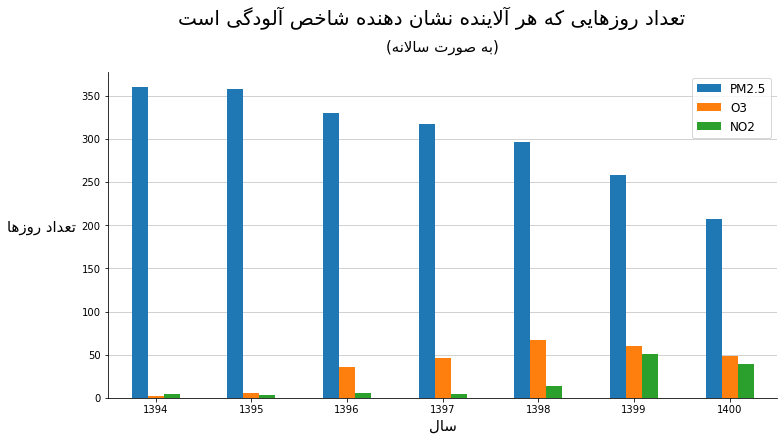

In [36]:
yrs = []
for year in range(1394,1401):
    dic = {}
    for i in AQ_final.columns[1:]:
        df = AQ_final[AQ_final.year == year][AQ_final.AQI == AQ_final[i]]
        dic[i] = df.shape[0]  
    yrs.append(dic)
    
mhyr = pd.DataFrame(yrs, index=range(1394,1401))

mhyr[['PM2.5','O3','NO2']].plot(kind='bar', figsize=(12,6), zorder=3)
plt.xticks(rotation=0);
plt.xlabel(get_display(reshape('سال')), fontsize=15)
plt.ylabel(get_display(reshape('تعداد روزها')), rotation=0, fontsize=15, labelpad=40)
plt.legend(fontsize='large')
sns.despine(right=True)
plt.suptitle(get_display(reshape('تعداد روزهایی که هر آلاینده نشان دهنده شاخص آلودگی است')), fontsize=20, y=1.03)
plt.title(get_display(reshape('(به صورت سالانه)')), fontsize=15, pad=20)
plt.grid(axis='y', alpha=.7, zorder=0)

plt.show();

<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color="blue">- 
همانطور که به وضوح در نمودار قابل مشاهده است تعداد روزهایی که عناصر آلاینده دی اکسید نیتروژن و اوزون در سطح زمین بیشترین مقدار را داشته اند و به عنوان شاخص آلودگی هوا انتخاب شده اند به طور معناداری در 7 سال اخیر در حال افزایش است
.</font></div>

<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color="blue">
عنصر آلاینده دی اکسید نیتروژن ناشی از فرآیندهای احتراق نظیر وسایط نقلیه، سیستم های گرمایش و نیروگاه ها می باشد. ازون نیز هنگامی تشکیل میشــود که آلاینده های منتشــره ازخودروها، نیروگاه ها، پالایشگاه ها، کارخانه های شیمیایی و سایر منابع در حضور نور خورشید واکنش شــیمیایی انجام میدهند.
</font></div>

<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color="blue">
لذا می توان نتیجه گرفت که افزایش فعالیت های صنعتی در سالهای اخیر و استفاده از ماشین های فرسوده و سوخت های بی کیفیت همراه با پدیده گرمایش جهانی موجب افزایش این آلاینده ها در سالهای اخیر شده است 
.</font></div>

---
---
<div dir="rtl" align=center lang="fa"><font face="Tahoma" size="5" color='grey'>پایان</font></div>

---
---